 Import necessary library package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_json("./renttherunway_final_data.json.gz", lines=True, compression='gzip')



 ## Data Exploration

 ### Data Cleaning

There are 15 columns of data and it seems like there are 
substantial amount of missing data for weight, body type and 
bust size


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [4]:
for col in df.columns:
    print(f"missing {col} data: {df[col].isnull().sum()}")



missing fit data: 0
missing user_id data: 0
missing bust size data: 18411
missing item_id data: 0
missing weight data: 29982
missing rating data: 82
missing rented for data: 10
missing review_text data: 0
missing body type data: 14637
missing review_summary data: 0
missing category data: 0
missing height data: 677
missing size data: 0
missing age data: 960
missing review_date data: 0


By checking the first couple data, we realized that height, weight and bust size
should be transformed into numerical data

In [5]:
df.head()


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


As of now, we can simply drop all the data that are incomplete

(MAYBE CHANGE LATER)

In [6]:
df.dropna(inplace=True)


 Transform weight to numerical value

In [7]:
# before
df["weight"].head()

0    137lbs
1    132lbs
3    135lbs
4    145lbs
5    138lbs
Name: weight, dtype: object

In [8]:
# get rid of 'lbs'
df["weight"] = df["weight"].apply(lambda s: int(s[:-3]))

In [9]:
# after
df["weight"].head()


0    137
1    132
3    135
4    145
5    138
Name: weight, dtype: int64

 Transform height to inches

In [10]:
df["height"].head()

0    5' 8"
1    5' 6"
3    5' 5"
4    5' 9"
5    5' 8"
Name: height, dtype: object

In [11]:
# Transform feet to inches
# total inches = (feet) * 12 + inches
df["height"] = df["height"].apply(lambda s: int(s[0]) * 12 + int(s[-3:-1]))


In [12]:
df["height"]



0         68
1         66
3         65
4         69
5         68
          ..
192539    69
192540    61
192541    68
192542    66
192543    66
Name: height, Length: 146381, dtype: int64

 TODO: encode bust size, perhaps use use hot encoding for the lettering

In [13]:
df["bust size"].unique()



array(['34d', '34b', '34c', '32b', '34d+', '36a', '36d', '32d+', '32c',
       '30dd', '36b', '36c', '32d', '34a', '34dd', '32a', '34ddd/e',
       '38d+', '38a', '38b', '38d', '36ddd/e', '38dd', '38f', '42dd',
       '40dd', '32dd', '38c', '30ddd/e', '32ddd/e', '36dd', '36d+', '40d',
       '28dd', '42c', '30d', '30b', '34aa', '32aa', '36f', '28c', '36aa',
       '34g', '42ddd/e', '40c', '34f', '28g', '28aa', '36g', '28f',
       '44ddd/e', '42d', '40ddd/e', '30c', '30aa', '44dd', '32i', '32g',
       '30g', '30h', '30a', '34j', '38ddd/e', '32h', '28a', '32f', '44d',
       '40h', '38g', '40g', '28b', '34h', '36j', '36h', '28ddd/e', '44f',
       '34i', '30f', '36i', '30i', '28h', '42b', '42j', '40f', '38aa',
       '38i', '48dd', '28d', '46ddd/e', '42g', '48d', '38h', '40b', '40j',
       '32j', '38j', '44b', '44c', '44g', '42f', '44h'], dtype=object)

 ### Data Visualizing

It seems like most of females are around 65 inches tall


mean height: 65.26305326510955
median height: 65.0


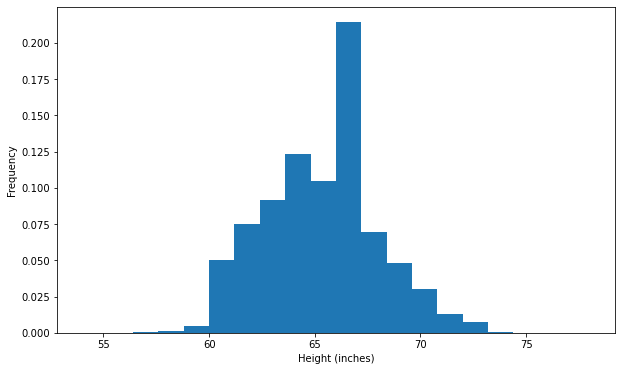

In [14]:
plt.figure(figsize=(10, 6))
ax = df["height"].plot.hist(bins=20, density=1)
ax.set_xlabel("Height (inches)")
print(f"mean height: {df['height'].mean()}")
print(f"median height: {df['height'].median()}")


The distribution of weight seems approximately normal


mean weight: 137.20987013341895
median weight: 135.0


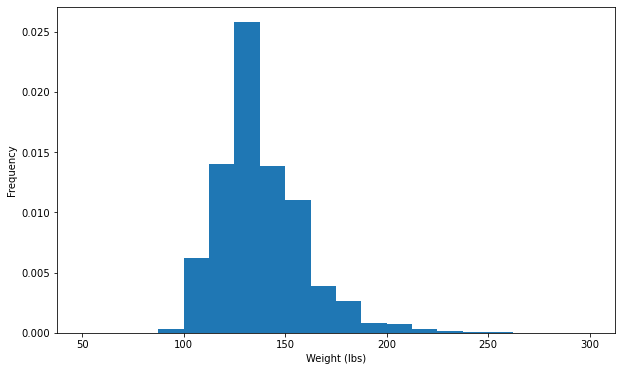

In [15]:
plt.figure(figsize=(10, 6))
ax = df["weight"].plot.hist(bins=20, density=1)
ax.set_xlabel("Weight (lbs)")
print(f"mean weight: {df['weight'].mean()}")
print(f"median weight: {df['weight'].median()}")



Most are around 34 years old

mean age: 34.08979990572547
median age: 32.0


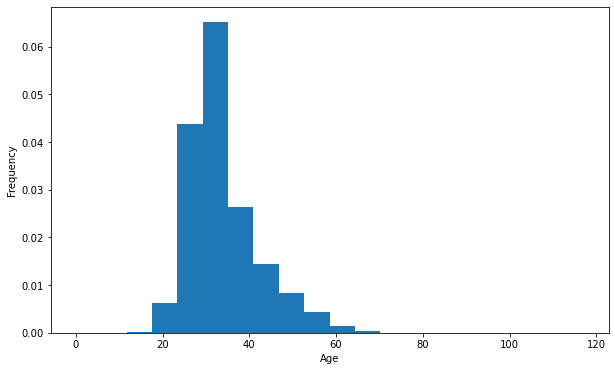

In [16]:

plt.figure(figsize=(10, 6))
ax = df["age"].plot.hist(bins=20, density=1)
ax.set_xlabel("Age")
print(f"mean age: {df['age'].mean()}")
print(f"median age: {df['age'].median()}")


TODO: pick a column to predict

In [17]:
# seems like most of the ratings are very high
df["rating"].describe()

count    146381.000000
mean          9.081985
std           1.437853
min           2.000000
25%           8.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

In [18]:
# most are fit
df["fit"].describe()


count     146381
unique         3
top          fit
freq      107733
Name: fit, dtype: object

<AxesSubplot:ylabel='Frequency'>

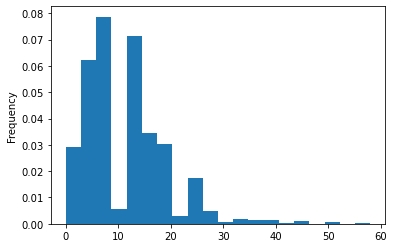

In [19]:
# size could be a good choice
df["size"].plot.hist(bins=20, density=1)

In [20]:
df["size"].unique()



array([14, 12,  8,  4,  1, 20,  2, 21, 16, 28, 24, 15,  5, 51, 32, 23, 48,
       45,  9, 39,  7, 17, 25, 29,  0, 13,  3, 34, 35, 11, 33, 27, 26, 36,
       43, 19, 44, 57, 40, 54, 38, 10, 46, 42, 49, 58, 52,  6, 56, 50, 41,
       30, 22, 18, 37, 55])